In [89]:
import pandas as pd
from numpy import log

data = pd.read_csv('mumbai_houses_task_filtred.csv')
data

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building
0,22400000,629,19.032800,72.896357,2,2,0,0,1,0,0,0,0
1,35000000,974,19.032800,72.896357,3,2,0,0,1,0,0,0,0
2,31700000,968,19.085600,72.909277,3,3,0,0,1,0,0,0,0
3,18700000,629,19.155756,72.846862,2,2,2,1,1,2,0,2,0
4,13500000,1090,19.177555,72.849887,2,2,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,19500000,810,19.138320,72.810020,2,2,0,1,0,0,2,0,0
6233,22000000,1400,19.221920,72.854250,3,3,1,1,0,1,0,1,0
6234,20000000,750,19.144320,72.824111,2,2,0,1,0,0,0,0,0
6235,11000000,700,19.047201,72.872225,2,2,0,1,0,0,1,0,0


# Выделение целевого признака и предикторов

In [90]:
y = data['price']
y = (y / 86.38).astype(int)
X = data.drop(columns=["price"], axis=1)
y

0       259319
1       405186
2       366983
3       216485
4       156286
         ...  
6232    225746
6233    254688
6234    231535
6235    127344
6236    173651
Name: price, Length: 6237, dtype: int64

In [91]:
X

,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building
0,629,19.032800,72.896357,2,2,0,0,1,0,0,0,0
1,974,19.032800,72.896357,3,2,0,0,1,0,0,0,0
2,968,19.085600,72.909277,3,3,0,0,1,0,0,0,0
3,629,19.155756,72.846862,2,2,2,1,1,2,0,2,0
4,1090,19.177555,72.849887,2,2,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6232,810,19.138320,72.810020,2,2,0,1,0,0,2,0,0
6233,1400,19.221920,72.854250,3,3,1,1,0,1,0,1,0
6234,750,19.144320,72.824111,2,2,0,1,0,0,0,0,0
6235,700,19.047201,72.872225,2,2,0,1,0,0,1,0,0


# Разбиение на обучающую и тестовую выборки

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4989, 12), (4989,), (1248, 12), (1248,))

# Использование моделей для обучения

In [93]:
# Импорт моделей обучения
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Импорт метрик качества
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [94]:
# Функция для отображения оценки предсказанных значений относительно реальных
from math import sqrt

def errors(predict_array):
    print(
        f'MAE = {mean_absolute_error(y_true=y_test, y_pred=predict_array)}',
        f'MSE = {mean_squared_error(y_true=y_test, y_pred=predict_array)}',
        f'RMSE = {sqrt(mean_squared_error(y_true=y_test, y_pred=predict_array))}',
        f'MAPE = {mean_absolute_percentage_error(y_true=y_test, y_pred=predict_array)}',
        f'R^2 = {r2_score(y_true=y_test, y_pred=predict_array)}',
        sep='\n'
    )

In [95]:
# Предсказания для тестовой выборки (Линейная регрессия)
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
errors(y_pred_lr)
lr.coef_

MAE = 100105.50073856737
MSE = 30384007431.251926
RMSE = 174310.0898721928
MAPE = 0.4652727680769171
R^2 = 0.6734378998395816


array([ 2.51547321e+02, -9.53390303e+05, -8.71012187e+05,  8.41027664e+03,
        8.74522521e+04, -1.28236238e+03, -5.58479258e+04,  4.74274772e+03,
       -1.28236238e+03,  4.46936376e+03, -1.28236238e+03, -3.68834005e+03])

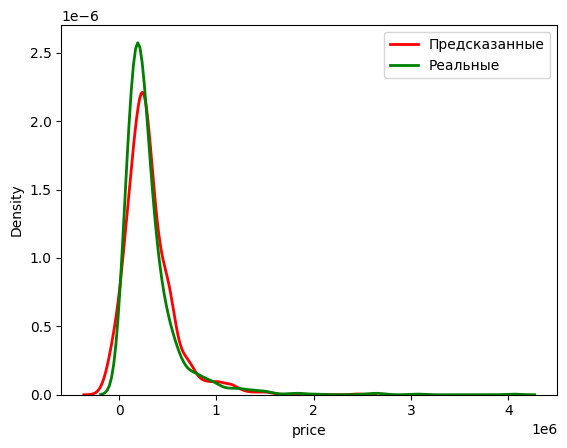

In [96]:
# Визуализация y_true и y_pred_lasso

import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(y_pred_lr, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [97]:
# Маштабирование данных

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
# L1 модель (Lasso)
lasso = Lasso(alpha=0.5, max_iter=50000).fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
errors(y_pred_lasso)
lasso.coef_

MAE = 100105.21567891943
MSE = 30383975418.127384
RMSE = 174309.9980440806
MAPE = 0.4652700418000606
R^2 = 0.6734382439111529


array([ 1.61830183e+05, -1.05262786e+05, -5.14625628e+04,  6.35620165e+03,
        6.77670358e+04, -4.86350908e+03, -1.11749743e+03,  1.53208127e+03,
       -1.25583905e+02,  3.54879578e+03, -6.08784455e-04, -9.23880014e+02])

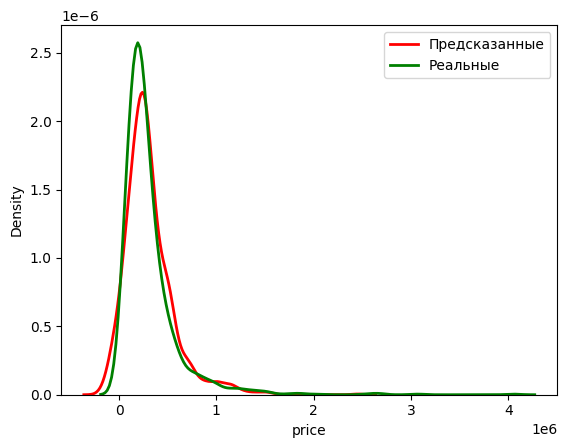

In [99]:
# Визуализация y_true и y_pred_lasso

import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(y_pred_lasso, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [100]:
# L2 модель (Ridge)
ridge = Ridge(alpha=0.5, max_iter=50000).fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
errors(y_pred_ridge)
ridge.coef_

MAE = 100101.71906735485
MSE = 30384358332.77802
RMSE = 174311.09641321754
MAPE = 0.4652259215947579
R^2 = 0.6734341284101686


array([ 161799.65650493, -105254.46863565,  -51458.58091335,
          6382.44569385,   67762.64926512,   -1662.02137113,
         -1117.55479112,    1533.26502475,   -1662.02137112,
          3548.53516294,   -1662.02137112,    -924.35536145])

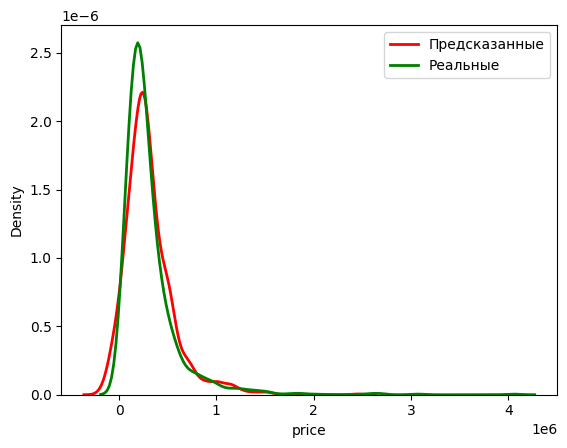

In [101]:
# Визуализация y_true и y_pred_ridge

import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(y_pred_ridge, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [102]:
# Elastic Net (комбинация L1 и L2)
el = ElasticNet(alpha=0.5, max_iter=50000).fit(X_train, y_train)
y_pred_el = el.predict(X_test)
errors(y_pred_el)
el.coef_

MAE = 117538.57144387516
MSE = 41183841062.53324
RMSE = 202938.02271268252
MAPE = 0.5555289862521711
R^2 = 0.5573631404453752


array([   303.99641614, -42043.24628486, -10969.31581025,  19733.95238346,
        54225.09170282,  -4988.88484941,   -226.73684911,   4313.21942309,
        -4988.74147019,   4383.95571488,  -4988.71477232,  -1203.86959955])

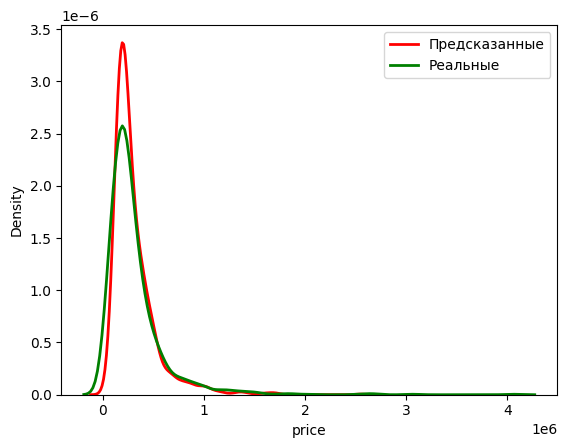

In [103]:
# Визуализация y_true и y_pred_el

import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(y_pred_el, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [104]:
# Полиномиальная регрессия

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_p = poly.fit_transform(X_train_scaled)
X_test_p = poly.transform(X_test_scaled)
lr2 = LinearRegression().fit(X_train_p, y_train)
y_pred_p = lr2.predict(X_test_p)
errors(y_pred_p)
lr2.coef_

MAE = 86041.97007648367
MSE = 23128486957.301468
RMSE = 152080.52787027493
MAPE = 0.3389461852711617
R^2 = 0.7514189893680523


array([ 1.25013427e+05, -1.00531188e+05, -7.25947936e+04,  3.02190777e+04,
        1.72797686e+04, -7.78603962e+02, -7.46082972e-01,  3.48629096e+02,
       -7.78603962e+02,  2.83232681e+04, -7.78603962e+02, -6.43675351e+01,
       -7.31807211e+03, -5.27490017e+04, -4.50023259e+04,  1.04965453e+04,
        1.06839073e+04, -2.43253849e+03,  1.90152121e+03, -2.54717367e+03,
       -2.43253849e+03, -8.76616066e+03, -2.43253849e+03,  8.33272747e+03,
        5.29006064e+03,  3.33565155e+04, -5.13904269e+03, -2.86574958e+04,
        1.67992367e+03, -2.01240262e+03,  4.18757807e+02,  1.67992367e+03,
       -1.69273461e+03,  1.67992367e+03,  3.69385236e+03,  4.88326731e+03,
        1.34887455e+04, -1.44344825e+04,  2.37716040e+02, -1.45413404e+03,
       -4.10922625e+02,  2.37716040e+02, -1.23621823e+03,  2.37716040e+02,
        1.19412525e+03, -8.42208892e+03,  9.51762215e+03, -7.36508603e+01,
       -8.81292892e+02,  4.34525393e+03, -7.36508603e+01,  5.94114926e+03,
       -7.36508603e+01,  

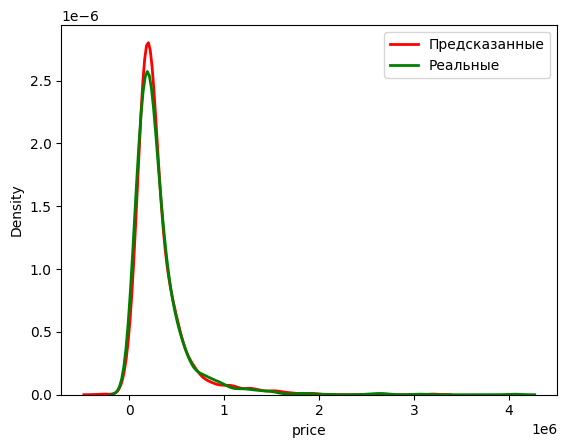

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(y_pred_p, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

# Поиск оптимального гиперпараметра для моделей 

In [106]:
# Импорт методов для подбора гиперпараметра
from hyperparameter_search import hyperparameter_search
import numpy as np

In [107]:
from hyperparameter_search import hyperparameter_search

models, methods = ('lasso', 'ridge', 'elasticnet'), ('GridSearchCV', 'RandomizedSearchCV')
parameters = {
    'lasso': {'alpha': np.arange(0.1, 10.1, 0.1)},
    'ridge': {'alpha': np.arange(0.1, 10.1, 0.1)},
    'elasticnet': {'alpha': np.arange(0.1, 10.1, 0.1), 'l1_ratio': np.arange(0.1, 1.1, 0.1)}
}

best_parameters = {}

for model in models:
    for method in methods:
        best_parameter = hyperparameter_search(model_name=model, method_search=method, parameters=parameters[model], X_train=X_train_scaled, y_train=y_train)
        best_parameters[f'{model}_{method}'] = best_parameter
        print(f'Лучший параметр для {model.capitalize()} методом {method}: {best_parameter}')

Лучший параметр для Lasso методом GridSearchCV: {'alpha': np.float64(10.0)}
Лучший параметр для Lasso методом RandomizedSearchCV: {'alpha': np.float64(8.2)}
Лучший параметр для Ridge методом GridSearchCV: {'alpha': np.float64(10.0)}
Лучший параметр для Ridge методом RandomizedSearchCV: {'alpha': np.float64(8.7)}
Лучший параметр для Elasticnet методом GridSearchCV: {'alpha': np.float64(0.2), 'l1_ratio': np.float64(0.9)}
Лучший параметр для Elasticnet методом RandomizedSearchCV: {'l1_ratio': np.float64(1.0), 'alpha': np.float64(1.6)}


In [108]:
# Optuna

from optuna_best_params import optuna

for model in models:
    best_parameter = optuna(model, X_train=X_train_scaled, y_train=y_train, X_test=X_test_scaled, y_test=y_test)
    best_parameters[f'{model}_optuna'] = best_parameter
    print(f'Лучший параметр для {model.capitalize()} методом optuna: {best_parameter}')

[I 2025-03-19 19:50:37,464] A new study created in memory with name: no-name-66e0200d-4a12-476c-a3ca-a2d4bdf02b64
[I 2025-03-19 19:50:37,469] Trial 0 finished with value: 30379150471.927578 and parameters: {'alpha': 79.17798800385216}. Best is trial 0 with value: 30379150471.927578.
[I 2025-03-19 19:50:37,473] Trial 1 finished with value: 30382086372.206642 and parameters: {'alpha': 31.01916018555828}. Best is trial 0 with value: 30379150471.927578.
[I 2025-03-19 19:50:37,478] Trial 2 finished with value: 30380529909.173203 and parameters: {'alpha': 56.54943688018553}. Best is trial 0 with value: 30379150471.927578.
[I 2025-03-19 19:50:37,483] Trial 3 finished with value: 30379980287.354305 and parameters: {'alpha': 65.2672559663661}. Best is trial 0 with value: 30379150471.927578.
[I 2025-03-19 19:50:37,488] Trial 4 finished with value: 30379204054.336613 and parameters: {'alpha': 78.27798449408412}. Best is trial 0 with value: 30379150471.927578.
[I 2025-03-19 19:50:37,496] Trial 5 f

Лучший параметр для Lasso методом optuna: 99.99438828110374


[I 2025-03-19 19:50:38,512] Trial 32 finished with value: 30384047980.217365 and parameters: {'alpha': 0.057832862842581934}. Best is trial 32 with value: 30384047980.217365.
[I 2025-03-19 19:50:38,519] Trial 33 finished with value: 30389289956.59986 and parameters: {'alpha': 7.418467356410987}. Best is trial 32 with value: 30384047980.217365.
[I 2025-03-19 19:50:38,527] Trial 34 finished with value: 30393818679.930176 and parameters: {'alpha': 13.60551506413951}. Best is trial 32 with value: 30384047980.217365.
[I 2025-03-19 19:50:38,534] Trial 35 finished with value: 30397228439.634804 and parameters: {'alpha': 18.16801056661636}. Best is trial 32 with value: 30384047980.217365.
[I 2025-03-19 19:50:38,542] Trial 36 finished with value: 30388042716.13748 and parameters: {'alpha': 5.687322455515792}. Best is trial 32 with value: 30384047980.217365.
[I 2025-03-19 19:50:38,549] Trial 37 finished with value: 30439749751.20877 and parameters: {'alpha': 69.88469233253012}. Best is trial 32 

Лучший параметр для Ridge методом optuna: 0.028655608689100123


[I 2025-03-19 19:50:39,207] Trial 17 finished with value: 81681688643.52809 and parameters: {'alpha': 30.591914220021568, 'l1_ratio': 0.2966147765155194}. Best is trial 10 with value: 30391755599.659943.
[I 2025-03-19 19:50:39,218] Trial 18 finished with value: 59253536637.22337 and parameters: {'alpha': 42.120383371584104, 'l1_ratio': 0.8932344660753601}. Best is trial 10 with value: 30391755599.659943.
[I 2025-03-19 19:50:39,230] Trial 19 finished with value: 50920363308.52718 and parameters: {'alpha': 8.816700536732338, 'l1_ratio': 0.69039546673775}. Best is trial 10 with value: 30391755599.659943.
[I 2025-03-19 19:50:39,241] Trial 20 finished with value: 48234003824.59595 and parameters: {'alpha': 26.98317881358715, 'l1_ratio': 0.9152272368781538}. Best is trial 10 with value: 30391755599.659943.
[I 2025-03-19 19:50:39,292] Trial 21 finished with value: 30395457252.82952 and parameters: {'alpha': 0.40311840654060255, 'l1_ratio': 0.9921277928286769}. Best is trial 10 with value: 303

Лучший параметр для Elasticnet методом optuna: (0.4743294304482788, 0.9954201653418158)


In [109]:
print(best_parameters)

{'lasso_GridSearchCV': {'alpha': np.float64(10.0)}, 'lasso_RandomizedSearchCV': {'alpha': np.float64(8.2)}, 'ridge_GridSearchCV': {'alpha': np.float64(10.0)}, 'ridge_RandomizedSearchCV': {'alpha': np.float64(8.7)}, 'elasticnet_GridSearchCV': {'alpha': np.float64(0.2), 'l1_ratio': np.float64(0.9)}, 'elasticnet_RandomizedSearchCV': {'l1_ratio': np.float64(1.0), 'alpha': np.float64(1.6)}, 'lasso_optuna': 99.99438828110374, 'ridge_optuna': 0.028655608689100123, 'elasticnet_optuna': (0.4743294304482788, 0.9954201653418158)}
